<table border=1 width=100%>
    <tr><td style="border: 1px solid white; width:600px; height:30px; text-align: center;"><font size=4 color=white><b>학습목표</b></font></td></tr>
    <tr><td style="border: 1px solid white; text-align: left;"><font size=3>
○ 이미지 변환 방법에 대해 학습한다.<br>
   - 확대 / 축소, 이동, 회전, 기울림, 대칭, 원근 변환, 원근 보정<br>
○ 이미지 증식 방법에 대해 학습한다.
</font></td></tr>
</table>

### 1. 이미지 변환

#### 1.1 이미지 확대
- cv2.resize(src,(w,h), interpolation)
- interpolation : 보간법 (이미지 변환시 깨지는 부분을 보간)
  - cv2.INTER_NEAREST : 최근방 이웃 보간법 - 빠르지만 화질이 떨어짐, 잘 쓰이지 않음
  - cv2.INTER_LINEAR : 양선형 보간법 (2x2 이웃 픽셀 참조) - 효율이 가장 좋음, 속도도 빠르고 화질도 우수
  - cv2.INTER_CUBIC : 3차 회선 보간법 (4x4 이웃 픽셀 참조) - NTER_LINEAR보다 느리지만 화질이 더 우수
  - cv2.INTER_LANCZOS4 : Lanczos 보간법 (8x6 이웃 픽셀 참조) - 속도가 느리지만 화질이 더 우수
  - cv2.INTER_AREA : 영역적인 정보를 추출해서 결과 영상을 셋팅 - 영상 축소시 효과적인 방법

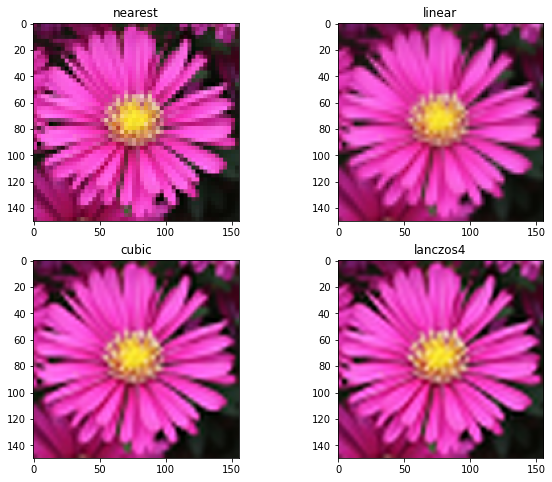

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./images/flower1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, channel = img.shape

img1 = cv2.resize(img,(w*3,h*3), interpolation = cv2.INTER_NEAREST)
img2 = cv2.resize(img,(w*3,h*3), interpolation = cv2.INTER_LINEAR)
img3 = cv2.resize(img,(w*3,h*3), interpolation = cv2.INTER_CUBIC)
img4 = cv2.resize(img,(w*3,h*3), interpolation = cv2.INTER_LANCZOS4)

plt.figure(figsize = (10, 8))
plt.subplot(2, 2, 1)
plt.title('nearest')
plt.imshow(img1)

plt.subplot(2, 2, 2)
plt.title('linear')
plt.imshow(img2)

plt.subplot(2, 2, 3)
plt.title('cubic')
plt.imshow(img3)

plt.subplot(2, 2, 4)
plt.title('lanczos4')
plt.imshow(img4)
plt.show()



#### 1.2 이미지 축소


In [2]:
img5 = cv2.resize(img, (int(w*0.5),int(h*0.5)),
        interpolation= cv2.INTER_CUBIC)
img6 = cv2.resize(img, (int(w*0.5),int(h*0.5)),
        interpolation= cv2.INTER_AREA)

cv2.imshow('ori', img)
cv2.imshow('5', img5)
cv2.imshow('6', img6)
cv2.waitKey(0)
cv2.destroyAllWindows()


#### 1.3 이미지 이동

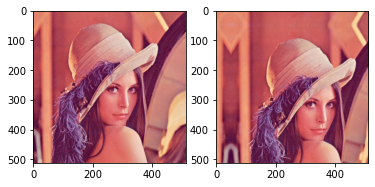

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('./images/lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h,w,channel = img.shape

# 이동 행렬()

M = np.float32([[1,0,50],  # 행렬계산 일어남 # x축이동
                [0,1,50]])   # y축 이동

move1 = cv2.warpAffine(img, M, (w,h), None,
                        cv2.INTER_LINEAR, cv2.BORDER_REFLECT)

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(move1)
plt.show()

- <font color = red>cv2.warpAffine(img, M, (w, h), dst, flags, borderValue)</font>
    - M : 행렬에 따른 affine 변환을 수행
    - (w, h) : 출력 이미지 크기
    - dst : 출력 영상에 대한 옵션
    - flags : 보간법 (cv2.INTER_LINEAR 등)
    - borderValue : 이동 후 빈 공간 채우는 방식(0또는 cv2.BORDER_REFLECT)

#### 1.4 이미지 회전
- <font color = red>cv2.getRotationMatrix2D(회전중심점, 각도, 확대비율)</font>

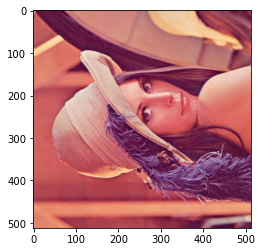

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('./images/lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, channel = img.shape

# 회전각 설정
M = cv2.getRotationMatrix2D((w/2,h/2),90,1)

result = cv2.warpAffine(img, M, (w,h), None,
                        cv2.INTER_LINEAR, cv2.BORDER_REFLECT)

plt.imshow(result)
plt.show()

#### 1.5 이미지 기울임

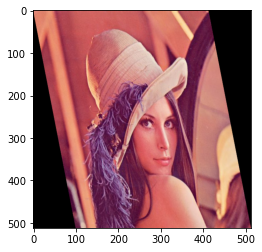

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('./images/lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, channel = img.shape

# 길이의 비와 평행성이 보존되는 변환
# 사각형이 평행사변형으로 변환(아핀 변환)

pts_1 = np.float32([ [0,0],[512,0],[0,512] ])
pts_2 = np.float32([ [0,0],[412,0],[100,512] ])

M = cv2.getAffineTransform(pts_1, pts_2)

result = cv2.warpAffine(img, M, (w,h), None,
                        cv2.INTER_LINEAR, 0)

plt.imshow(result)
plt.show()

#### 1.6 이미지 대칭

- <font color=red>cv2.flip(img, flipCode)</font>
  - flipCode : 대칭 방법
    - flipCode < 0 : 대각 대칭
    - flipCode = 0 : 상하 대칭
    - flipCode > 0 : 좌우 대칭

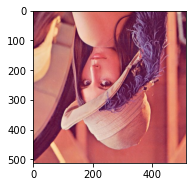

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('./images/lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.flip(img, flipCode=-1)

plt.subplot(1,2,1)
plt.imshow(img)
plt.show()

#### 1.7 원근 변환
- Affine 변환과는 달리 4개 점을 이용하여 이미지를 변환
- <font color=red>M = cv2.getPerspectiveTransform(pts1, pts2)</font>
  - pts1 좌표를 pts2 좌표로 원근 변환 설정
- <font color=red>result = cv2.warpPerspective(img, M, (w, h))</font>
  - 이미지, 변환값, 이미지 크기로 원근 변환 실행
  - (w, h) : 출력 이미지 크기

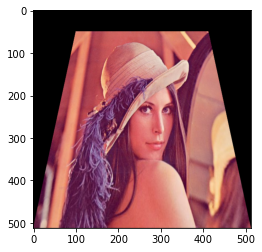

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('./images/lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, channel = img.shape

# 왼쪽 위점, 오른쪽 위점, 왼쪽 아래점, 오른쪽 아래점
pts1 = np.float32([ [0,0], [w,0], [0,h], [w,h] ])
pts2 = np.float32([ [100,50], [w-100,50], [0,h], [w,h] ])

M = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(img, M, (w, h))

plt.imshow(result)
plt.show()

#### 1.8 원근 보정
- 원근 변환을 이용하여 기울어진 이미지를 보정하는 방법

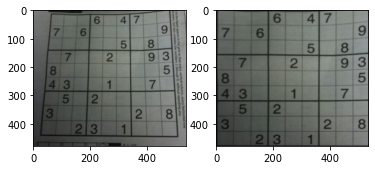

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('./images/hough.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, channel = img.shape

# 왼쪽 위점, 오른쪽 위점, 왼쪽 아래점, 오른쪽 아래점
pts1 = np.float32([ [61,15], [476,10], [25,440], [505,445] ])
pts2 = np.float32([ [0,0], [w,0], [0,h], [w,h] ])

M = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(img, M, (w, h))

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

#### 1.9 실습

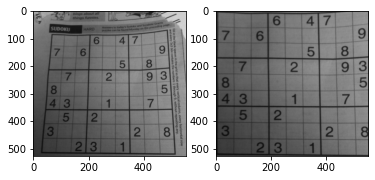

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('./images/sudoku.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, channel = img.shape

# 왼쪽 위점, 오른쪽 위점, 왼쪽 아래점, 오른쪽 아래점
pts1 = np.float32([ [65,83], [485,78], [28,520], [500,520] ])
pts2 = np.float32([ [0,0], [w,0], [0,h], [w,h] ])

M = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(img, M, (w, h))

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

### 2. 이미지 증식하기
- 훈련 데이터가 적은 경우 훈련 데이터를 늘리는 방식

In [83]:
import cv2
import matplotlib.pyplot as plt
import os
import random
import numpy as np

input_dir =  './images/input/'
output_dir = './images/output/'

if not os.path.exists(input_dir):
    os.mkdir(input_dir)

if not os.path.exists(output_dir):
    os.mkdir(output_dir)

# 이미지 불러오기
file_list = os.listdir(input_dir)

# 증식 횟수
epoch = 2
cnt = 0

for i in file_list:
    img = cv2.imread(input_dir + i)

    h, w, ch = img.shape
    # 이미지 증식
    for j in range(epoch):
        # 확대/축소
        param = random.uniform(0,3) # 0~3사이의 랜덤한 실수값

        # 확대
        if param >= 1.0:
            img2 = cv2.resize(img,(int(w*param),int(h*param)), interpolation = cv2.INTER_CUBIC)
        else: # 축소
            img2 = cv2.resize(img,(int(w*param),int(h*param)), interpolation = cv2.INTER_AREA)
        
        # 이동 값
        param2 = random.randint(-10,10)

        h, w, ch = img2.shape

        M = np.float32([[1,0,param2],
                        [0,1,0]])
        img3 = cv2.warpAffine(img2, M, (w,h), None,
                    cv2.INTER_LINEAR, cv2.BORDER_REFLECT)
        
        # 회전
        param3 = random.randint(-40,40)
        h, w, ch = img3.shape

        M = cv2.getRotationMatrix2D((w/2,h/2),param3,1)

        final = cv2.warpAffine(img3, M, (w,h), None,
                                cv2.INTER_LINEAR, cv2.BORDER_REFLECT)

        # 이미지 저장
        cv2.imwrite(output_dir + f'{cnt}.png', final,
                    params=[cv2.IMWRITE_PNG_COMPRESSION, 0])
        cnt+=1
